### Long-term Memory in AI Systems
Long-term memory in AI systems refers to the ability of an artificial intelligence to store and retrieve information over extended periods. This capability is crucial for tasks that require understanding context, learning from past experiences, and making informed decisions based on historical data.

La memoria a largo plazo en sistemas de inteligencia artificial puede describirse como "long-term memory in AI systems". Este concepto es esencial para desarrollar IA que pueda adaptarse y mejorar con el tiempo, similar a cómo los humanos aprenden y recuerdan información.

### Key Features of Long-term Memory in AI:
1. **Storage Capacity**: The ability to store vast amounts of data without significant degradation over time.
2. **Retrieval Mechanism**: Efficient methods for accessing stored information when needed.
3. **Learning from Experience**: The capability to update and refine stored knowledge based on new experiences.
4. **Contextual Understanding**: The ability to use past information to inform current decisions and actions.

### Características clave de la memoria a largo plazo en IA:
1. **Capacidad de almacenamiento**: La capacidad de almacenar grandes cantidades de datos sin una
    degradación significativa con el tiempo.
2. **Mecanismo de recuperación**: Métodos eficientes para acceder a la información almacenada cuando sea necesario.
3. **Aprendizaje a partir de la experiencia**: La capacidad de actualizar y refinar el conocimiento almacenado en función de nuevas experiencias.
4. **Comprensión contextual**: La capacidad de utilizar información pasada para informar decisiones y acciones actuales.

### Chroma db and Long-term Memory
Chroma db is a database designed to support long-term memory in AI systems. It provides robust storage solutions and efficient retrieval mechanisms, making it easier for AI applications to maintain and utilize long-term knowledge.

Chroma db es una base de datos diseñada para soportar la memoria a largo plazo en sistemas de IA. Proporciona soluciones de almacenamiento robustas y mecanismos de recuperación eficientes, facilitando que las aplicaciones de IA mantengan y utilicen el conocimiento a largo plazo.

In [1]:
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_chroma import Chroma

embbedings = OpenAIEmbeddings(model="text-embedding-3-large")
llm = ChatOpenAI(model="gpt-4o-mini")

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embbedings,
    persist_directory="longterm_memory_db"
)


In [6]:
# load document txt 
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document


#loader document
loader = TextLoader(file_path="text_chroma.txt", encoding="utf-8")
documents = loader.load()

print(f"Documentos cargados : {len(documents)}")


## Text Splitter /dividir en chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
chunks =  text_splitter.split_documents(documents)

## add a chromadb
ids = vector_store.add_documents(chunks)
print(f"ids generados :  {ids}")

test_results =  vector_store.similarity_search("que es llm",k=2)
print(f"Resultado de pruebas: {len(test_results)}")
print(f"results : {test_results}")


Documentos cargados : 1
ids generados :  ['b94f4462-cdad-4244-9062-41987533fc18', '86c0614b-2d15-4b9d-b7ba-50f0d8d39554', '83affddf-cafa-4354-8a09-2471da8e965f', 'fe993067-4690-4dbd-810a-7f9b46e11ee1', '59a4a1d5-6bae-4958-93dc-eacfe825928a', 'e38cfe42-d142-488d-a50a-9da16fe50aae', 'e06628d6-7401-4ecd-b05c-f13140c408ba', '7103e238-0340-4fe6-bbb4-9c0e09cf5218', 'd64f5d8b-bac0-4085-859a-3924f47fe5e1', 'b3630468-bb02-421c-90c0-02cc9ff84ac0', 'd5633c34-7ba1-412f-8648-90291d110fca', '7b0d6a46-d413-413d-874f-c5f88f560edf', '96838791-4dbf-4e35-aceb-bb3b1370418d', '0633712e-9609-4ee7-9641-1ef4822225aa']
Resultado de pruebas: 2
results : [Document(id='b94f4462-cdad-4244-9062-41987533fc18', metadata={'source': 'text_chroma.txt'}, page_content='The system comprises of 4 stages:\n\n(1) Task planning: LLM works as the brain and parses the user requests into multiple tasks. There are four attributes associated with each task: task type, ID, dependencies, and arguments. They use few-shot examples to g

### Tool Creation for Retrievers
In AI systems, retrievers are components that fetch relevant information from a database or knowledge base. Creating tools for retrievers allows AI agents to access and utilize this information effectively.  


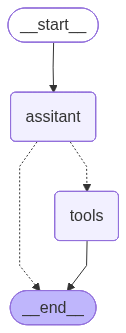

In [14]:
from pprint import pprint
from IPython.display import Image, display

from langchain_openai.chat_models import ChatOpenAI
from langgraph.graph import StateGraph, START, END 
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.messages import HumanMessage

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")  # Fix: era "embbedings"
llm = ChatOpenAI(model="gpt-4o-mini")

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embbedings,
    persist_directory="longterm_memory_db"
)

retriever = vector_store.as_retriever(search_kwargs = {"k":2})

retriever_tool = create_retriever_tool(
    retriever=retriever,
    name="knowledge_search_tool",
    description=(
        "Busca información relevante en la base de conocimientos sobre "
        "memoria a largo plazo, IA, ChromaDB y temas relacionados. "
        "Úsala cuando necesites información específica para responder preguntas."
    )
)

llm_with_tools =  llm.bind_tools([retriever_tool])

def assistant(state: MessagesState):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

workflow = StateGraph(MessagesState)
workflow.add_node("assitant",assistant)
workflow.add_node("tools", ToolNode([retriever_tool]))

workflow.add_edge(START,"assitant")
workflow.add_conditional_edges(
    "assitant",
    tools_condition
)

workflow.add_edge("tools",END)
graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
# ✅ CONVERSACIÓN CORREGIDA (SIN INDENTACIÓN INCORRECTA)
conversation = [
    "Sobre IA en el documento"
]

# Estado de conversación acumulativo
conversation_state = {"messages": []}

for i, user_message in enumerate(conversation, 1):
    print(f"\n👤 Usuario {i}: {user_message}")
    
    # Agregar mensaje del usuario
    conversation_state["messages"].append(HumanMessage(content=user_message))
    
    # Obtener respuesta del agente
    result = graph.invoke(conversation_state)
    
    # Actualizar estado con la respuesta completa
    conversation_state = result
    
    # Mostrar respuesta del agente
    ai_response = result["messages"][-1]
    print(f"🤖 Agente: {ai_response.content}")
    
    # Estadísticas
    print(f"📊 Mensajes en conversación: {len(conversation_state['messages'])}")


👤 Usuario 1: Sobre IA en el documento
🤖 Agente: API-Bank (Li et al. 2023) is a benchmark for evaluating the performance of tool-augmented LLMs. It contains 53 commonly used API tools, a complete tool-augmented LLM workflow, and 264 annotated dialogues that involve 568 API calls. The selection of APIs is quite diverse, including search engines, calculator, calendar queries, smart home control, schedule management, health data management, account authentication workflow and more. Because there are a large number of APIs, LLM first has access to API search engine to find the right API to call and then uses the corresponding documentation to make a call.
Pseudo code of how LLM makes an API call in API-Bank. (Image source: Li et al. 2023)

In the API-Bank workflow, LLMs need to make a couple of decisions and at each step we can evaluate how accurate that decision is. Decisions include:

API-Bank (Li et al. 2023) is a benchmark for evaluating the performance of tool-augmented LLMs. It conta